In [ ]:
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from collections import Counter
from fa2 import ForceAtlas2
import plotly.graph_objects as go
import math
import pandas as pd
from nltk.corpus import PlaintextCorpusReader
import nltk
from nltk.probability import FreqDist
import numpy as np
import copy

In [ ]:
#Read the GCC
G = nx.read_gpickle("WG.gpickle")

G = G.to_undirected()

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

# compute the best partition
partition = community_louvain.best_partition(G0, random_state=1)

In [ ]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(GGcc, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:15<00:00, 130.93it/s]BarnesHut Approximation  took  3.91  seconds
Repulsion forces  took  9.82  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.46  seconds



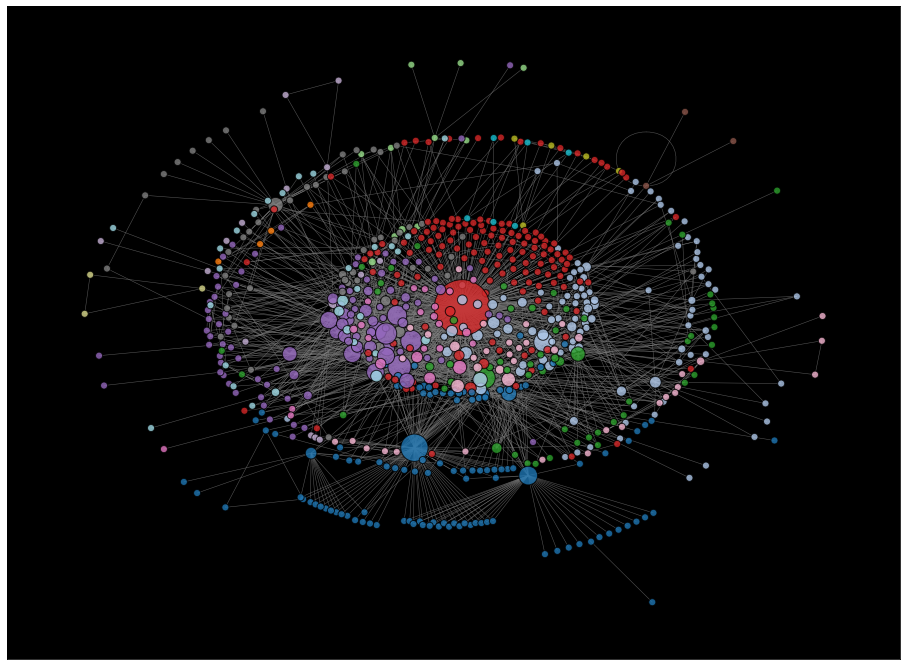

In [ ]:
# draw the graph
plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(G0)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition.values()) + 1)
nx.draw_networkx_nodes(G0, pos, partition.keys(), node_size=[max(v * 8, 50) for v in d.values()],
                       cmap=cmap, node_color=list(partition.values()), alpha=0.8)
nx.draw_networkx_edges(G0, pos, alpha=0.7, width=0.5, edge_color = 'grey')
ax = plt.gca() # to get the current axis
ax.set_facecolor("#000000")
ax.collections[0].set_edgecolor("#000000")

plt.show()

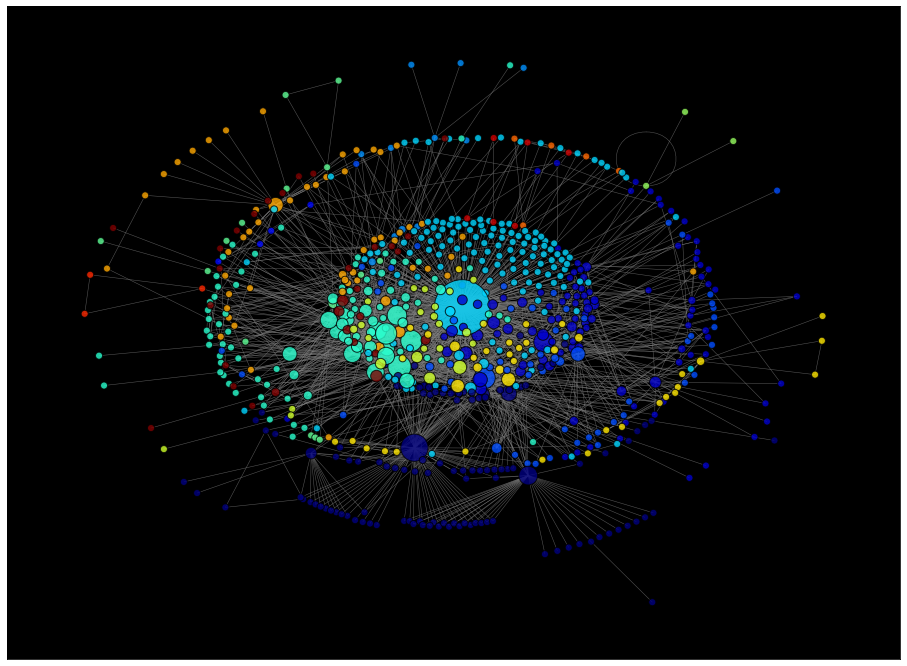

In [ ]:
# draw the graph
plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(G0)
# color the nodes according to their partition
cmap = cm.get_cmap('jet', max(partition.values()) + 1)
nx.draw_networkx_nodes(G0, pos, partition.keys(), node_size=[max(v * 8, 50) for v in d.values()],
                       cmap=cmap, node_color=list(partition.values()), alpha=0.8)
nx.draw_networkx_edges(G0, pos, alpha=0.7, width=0.5, edge_color = 'grey')
ax = plt.gca() # to get the current axis
ax.set_facecolor("#000000")
ax.collections[0].set_edgecolor("#000000")

plt.show()

In [ ]:
print(f"Number of communities found: {max(partition.values())+1}")

Number of communities found: 16


In [ ]:
print(f'The value of modularity is: {community_louvain.modularity(partition, G0)}')

The value of modularity is: 0.5508758787987692


In [ ]:
community = list()
community_size = list()
for i in range(max(partition.values())+1):
    community.append(i)
    community_size.append(Counter(partition.values())[i])
print(community_size)

[117, 108, 4, 58, 11, 152, 103, 15, 3, 23, 40, 55, 5, 3, 6, 30]


In [ ]:
community

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

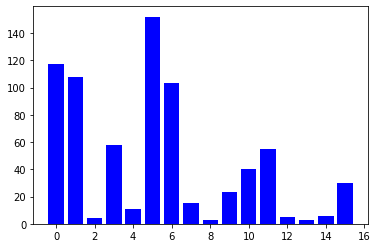

In [ ]:
plt.bar(range(max(partition.values())+1), community_size, color='blue')
plt.show()

In [ ]:
def name_communities(G0, partition, community_size):
    # Find all node degress
    degrees = [val for (node, val) in G0.degree()]

    # Create node degree dataframe
    df_community = pd.DataFrame()
    df_community["Name"] = list(partition.keys())
    df_community["Community"] = list(partition.values())
    df_community["Degree"] = degrees

    df_community_group = df_community.groupby(['Community', 'Name', 'Degree']).count().reset_index()
    df = df_community_group.copy()

    df_community_group = df_community_group.sort_values('Degree', ascending = False).groupby('Community').head(3)

    df_community_group = df_community_group.groupby('Community')['Name'].agg(lambda col: '-'.join(col)).reset_index()
    df_community_group.columns = ['CommunityID', 'CommunityName']
    df_community_group["CommunitySize"] = community_size
    return df_community_group, df





In [ ]:
df_com_names, df = name_communities(G0, partition, community_size)
pd.merge(df, df_com_names, left_on="Community", right_on="CommunityID")

,Community,Name,Degree,CommunityID,CommunityName,CommunitySize
0,0,Aldert Geert,6,0,Gwent players-The Witcher 3 merchants-Blacksmith,117
1,0,Anisse,4,0,Gwent players-The Witcher 3 merchants-Blacksmith,117
2,0,Anselm (merchant),5,0,Gwent players-The Witcher 3 merchants-Blacksmith,117
3,0,Armorer,17,0,Gwent players-The Witcher 3 merchants-Blacksmith,117
4,0,Armorer (Hierarch Square),1,0,Gwent players-The Witcher 3 merchants-Blacksmith,117
...,...,...,...,...,...,...
728,15,Otrygg an Hindar,2,15,Crach an Craite-Bran Tuirseach-Cerys an Craite,30
729,15,Svanrige Tuirseach,7,15,Crach an Craite-Bran Tuirseach-Cerys an Craite,30
730,15,Udalryk an Brokvar,5,15,Crach an Craite-Bran Tuirseach-Cerys an Craite,30
731,15,Uve Jabberjaw,2,15,Crach an Craite-Bran Tuirseach-Cerys an Craite,30


In [ ]:
def community_top_words(chosen_comms, df_com_names, partition, number_of_words):
    chosen_comms_idx = []
    for i in chosen_comms:
        chosen_comms_idx.append(df_com_names.index[df_com_names['CommunityName'] == i].tolist()[0])

    
    #Generate dictionary of community texts
    texts_dict = {}
    data_root = "/work/socialgraph-witcher-analysis/notebooks/data_all_clean"

    for idx in chosen_comms_idx:
        char_list = []
        for char in partition.keys():
            if partition[char] == idx:
                char_list.append(f"{char}.txt")
        
        wordlists_community = PlaintextCorpusReader(data_root, char_list)
        community_texts = nltk.Text(wordlists_community.words())
        texts_dict[idx] = community_texts


    #Make TF dictionary
    TF_dict = {}
    for comm in texts_dict.keys():
        term_dict = {}
        for key, value in FreqDist(texts_dict[comm]).items():
            term_dict[key] = value/len(texts_dict[comm])
        TF_dict[comm] = term_dict


    #Get list of all words from all communities
    gathered_texts = list(list(texts_dict.values())[0])
    for text in list(texts_dict.values())[1:]:
        gathered_texts.extend(list(text))

    #Make IDF dictionary
    idf_dict = {}
    for word in np.unique(gathered_texts):
        number_of_documents = 0
        for comm in texts_dict.keys():
            if word in TF_dict[comm].keys():
                number_of_documents += 1
        idf_dict[word] = math.log10(len(texts_dict.keys())/number_of_documents)

    #Make tf_idf_dict
    tf_idf_dict = copy.deepcopy(TF_dict)
    for comm in tf_idf_dict.keys():
        for word in tf_idf_dict[comm].keys():
            tf_idf_dict[comm][word] = tf_idf_dict[comm][word] * idf_dict[word]

    #Make prints of top 5 words for each chosen community
    for key in tf_idf_dict.keys():
        print(f"Top 5 words from the {chosen_comms[chosen_comms_idx.index(key)]} community, based on TF-IDF is:")
        print(sorted(tf_idf_dict[key], key=tf_idf_dict[key].get, reverse=True)[:number_of_words])
        print("")    

In [ ]:
chosen_comms = ['Geralt of Rivia-Zoltan Chivay-Francis Bedlam']#, 'Gwent players-The Witcher 3 merchants-Blacksmith', 'Ciri-Triss Merigold-Yennefer of Vengerberg']
community_top_words(chosen_comms, df_com_names, partition, 5)

Top 5 words from the Geralt of Rivia-Zoltan Chivay-Francis Bedlam community, based on TF-IDF is:
['unusually', 'vicious', 'large', 'archespore', 'swamp']



## LDA

In [ ]:
import gensim.corpora as corpora
from gensim.models import TfidfModel
from pprint import pprint
import gensim
from nltk.corpus import stopwords
nltk.download('stopwords')
from os import listdir
from os.path import isfile, join

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(texts, stop_words):
    return [[word for word in doc 
             if word not in stop_words] for doc in texts]

In [ ]:
#LDA Communities

chosen_comms_idx = []
for i in chosen_comms:
    chosen_comms_idx.append(df_com_names.index[df_com_names['CommunityName'] == i].tolist()[0])

stop_words = stopwords.words('english')
stop_words.extend(['however', 'though', 'would', 'later', 'could'])

#Generate dictionary of community texts
comm_data = []
data_root = "/work/socialgraph-witcher-analysis/notebooks/data_all_clean"

for idx in chosen_comms_idx:
    char_list = []
    for char in partition.keys():
        if partition[char] == idx:
            char_list.append(f"{char}.txt")
    
    wordlists_community = PlaintextCorpusReader(data_root, char_list)
    words = wordlists_community.words()
    comm_data.append(words)

comm_data = remove_stopwords(comm_data, stop_words)

In [ ]:
#LDA all characters
stop_words = stopwords.words('english')
stop_words.extend(['however', 'though', 'would', 'later', 'could'])

#Generate dictionary of community texts
comm_data = []
data_root = "/work/socialgraph-witcher-analysis/notebooks/data_all_clean"

filelists = PlaintextCorpusReader(data_root, '.*')
the_files = [f for f in listdir(data_root) if isfile(join(data_root, f))]

for char in the_files:
    words = filelists.words(char)
    comm_data.append(words)

comm_data = remove_stopwords(comm_data, stop_words)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(comm_data)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in comm_data]

model = TfidfModel(corpus=corpus, normalize=True) #fit model


vector = [model[corpus[i]] for i in range(len(comm_data))] #apply tf_idf

In [ ]:
len(corpus[0])

4866

In [ ]:
len(vector[0])

3846

In [ ]:
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=vector,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"started" + 0.000*"whoreson" + 0.000*"torque" + 0.000*"revealed" + '
  '0.000*"junior" + 0.000*"away" + 0.000*"refugee" + 0.000*"brother" + '
  '0.000*"learned" + 0.000*"yantra"'),
 (1,
  '0.000*"saskia" + 0.000*"revealed" + 0.000*"go" + 0.000*"whoreson" + '
  '0.000*"brother" + 0.000*"torque" + 0.000*"dethmold" + 0.000*"síle" + '
  '0.000*"muinne" + 0.000*"junior"'),
 (2,
  '0.000*"journeyman" + 0.000*"armorer" + 0.000*"blacksmith" + 0.000*"amateur" '
  '+ 0.000*"kingfisher" + 0.000*"meteorite" + 0.000*"craft" + 0.000*"svorlag" '
  '+ 0.000*"harviken" + 0.000*"fayrlund"'),
 (3,
  '0.000*"journeyman" + 0.000*"saskia" + 0.000*"síle" + 0.000*"dethmold" + '
  '0.000*"armorer" + 0.000*"blacksmith" + 0.000*"meteorite" + '
  '0.000*"kingfisher" + 0.000*"amateur" + 0.000*"fayrlund"'),
 (4,
  '0.000*"saskia" + 0.000*"síle" + 0.000*"dethmold" + 0.000*"revealed" + '
  '0.000*"loc" + 0.000*"muinne" + 0.000*"lodge" + 0.000*"dragon" + 0.000*"go" '
  '+ 0.000*"duny"')]


In [ ]:
doc_lda

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensim
import pickle 
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/work/socialgraph-witcher-analysis/notebooks/ldavis_prepared/lda'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/work/socialgraph-witcher-analysis/notebooks/ldavis_prepared/lda'+str(num_topics) +'.html')
LDAvis_prepared

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.014527 -0.005672       1        1  35.623221
4     -0.000372  0.009492       2        1  34.519329
2      0.001442  0.007180       3        1  17.702309
1      0.004688 -0.001773       4        1   7.374530
0      0.008769 -0.009226       5        1   4.780611, topic_info=           Term       Freq      Total Category  logprob  loglift
3277   crafting  61.000000  61.000000  Default  30.0000  30.0000
2496      witch  42.000000  42.000000  Default  29.0000  29.0000
376        1272  69.000000  69.000000  Default  28.0000  28.0000
454    novigrad  87.000000  87.000000  Default  27.0000  27.0000
3276  component  40.000000  40.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
1026    brother   2.352600  57.781431   Topic5  -7.7223  -0.1605
574        deck   2.433787  87.330000   Topic5  -7.6884  -0.5396
484    skellige   2.352351  64.922047   Topic5  -7.7224  -0.2772
349          us   2.190746  36.533188   Topic5  -7.7936   0.2266
109        even   2.195599  45.342116   Topic5  -7.7914   0.0128

[378 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
512       1  0.416127    1271
512       2  0.182055    1271
512       3  0.286087    1271
512       4  0.078024    1271
512       5  0.026008    1271
...     ...       ...     ...
4923      1  0.333588  wyvern
4923      2  0.266871  wyvern
4923      3  0.066718  wyvern
4923      4  0.266871  wyvern
4923      5  0.066718  wyvern

[1252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 2, 1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>